## Libraries and Configuration

In [294]:
# Libraries
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Configuration
data_path = './data/hr-analytics/'


## Load Data

In [295]:
df = pd.read_csv(data_path+'general_data.csv',sep=",")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


## Data Exploration

In [296]:
# Columns in data
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [297]:
# Data types
print(df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [298]:
# Data Exploration
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


## Clean-up Data

In [299]:
# Clean Up

# Handle nulls  --> NumCompaniesWorked         4391/4410 non-null float64
df = df.fillna(0)

# Remove irrelevant columns
df.drop(['EmployeeCount', 'EmployeeID', 'StandardHours'],axis=1, inplace = True)

# Convert 'Attrition' from Yes/No to 1/0
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

#Create Age Groups
df.loc[df['Age'] <= 30,'Age'] = 1
df.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age'] = 2
df.loc[(df['Age'] > 40) & (df['Age'] <= 50), 'Age'] = 3
df.loc[(df['Age'] > 50), 'Age'] = 4

#Create DistanceFromHome Groups
df.loc[df['DistanceFromHome'] <= 10,'DistanceFromHome'] = 1
df.loc[(df['DistanceFromHome'] > 10) & (df['DistanceFromHome'] <= 20), 'DistanceFromHome'] = 2
df.loc[(df['DistanceFromHome'] > 20), 'DistanceFromHome'] = 3

#Create Income Groups
df.loc[df['MonthlyIncome'] <= 50000,'MonthlyIncome'] = 1
df.loc[(df['MonthlyIncome'] > 50000) & (df['MonthlyIncome'] <= 100000), 'MonthlyIncome'] = 2
df.loc[(df['MonthlyIncome'] > 100000) & (df['MonthlyIncome'] <= 150000), 'MonthlyIncome'] = 3
df.loc[(df['MonthlyIncome'] > 150000) , 'MonthlyIncome'] = 4

# Convert string fields
labelEncoder_X = LabelEncoder()
df['BusinessTravel'] = labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department'] = labelEncoder_X.fit_transform(df['Department'])
df['EducationField'] = labelEncoder_X.fit_transform(df['EducationField'])
df['Gender'] = labelEncoder_X.fit_transform(df['Gender'])
df['JobRole'] = labelEncoder_X.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelEncoder_X.fit_transform(df['MaritalStatus'])
df['Over18'] = labelEncoder_X.fit_transform(df['Over18'])
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,0,2,2,1,2,1,0,1,0,...,3,1.0,0,11,0,1.0,6,1,0,0
1,2,1,1,1,1,1,1,0,1,6,...,1,0.0,0,23,1,6.0,3,5,1,4
2,2,0,1,1,2,4,4,1,4,7,...,4,1.0,0,15,3,5.0,2,5,0,3
3,2,0,0,1,1,5,1,1,3,1,...,2,3.0,0,11,3,13.0,5,8,7,5
4,2,0,2,1,1,1,3,1,1,7,...,1,4.0,0,12,2,9.0,2,6,0,4


## Correlation Among Features

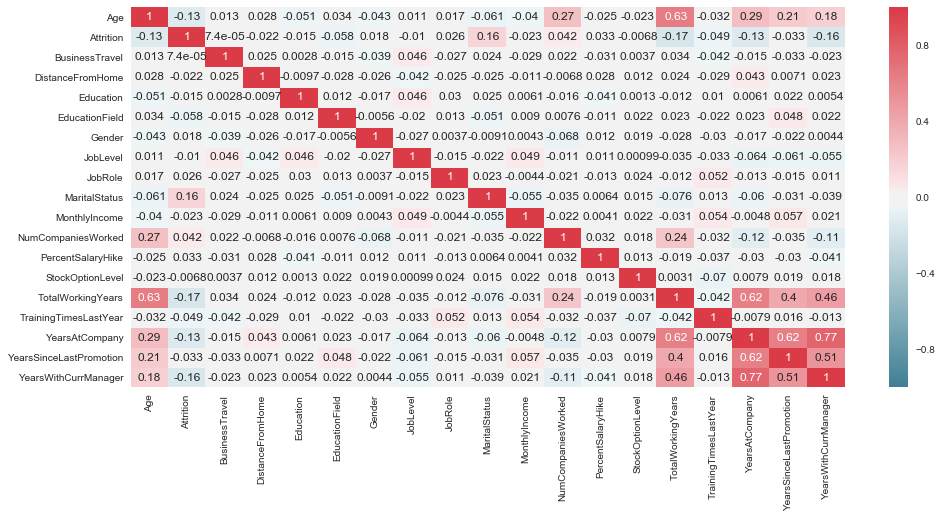

In [300]:
# Correlation Among Features
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

corr = corr_cols.corr()
plt.figure(figsize=(16,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, cmap=cmap)
plt.show()

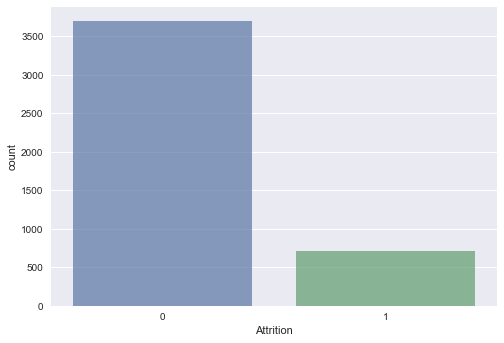

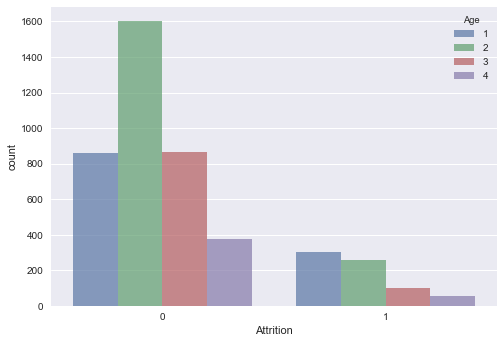

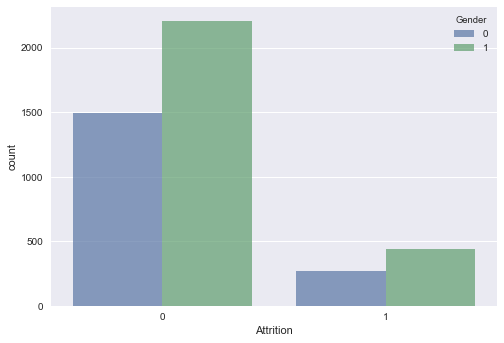

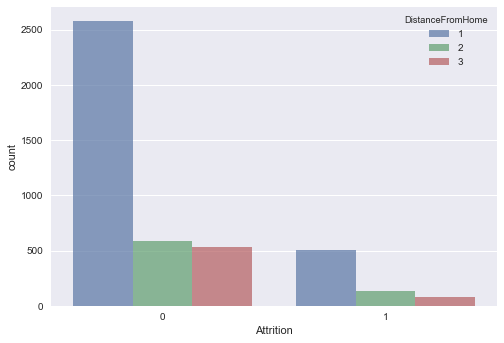

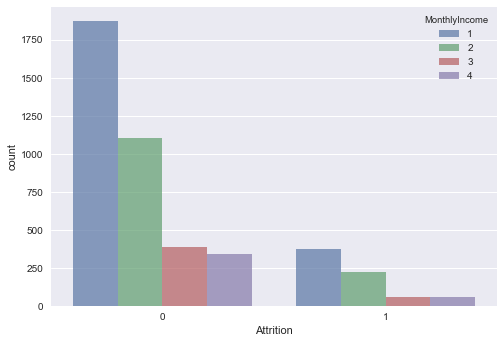

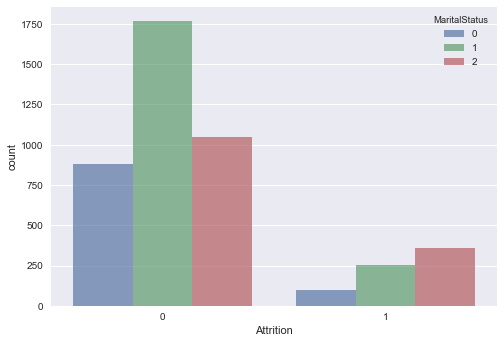

In [301]:
# Visualize Attrition count by some features
sns.countplot(x = 'Attrition',data=df, alpha=0.7)
plt.show()

sns.countplot(x = 'Attrition',data=df,hue='Age', alpha=0.7)
plt.show()

sns.countplot(x = 'Attrition',data=df,hue='Gender', alpha=0.7)
plt.show()

sns.countplot(x = 'Attrition',data=df,hue='DistanceFromHome', alpha=0.7)
plt.show()

sns.countplot(x = 'Attrition',data=df,hue='MonthlyIncome', alpha=0.7)
plt.show()

sns.countplot(x = 'Attrition',data=df,hue='MaritalStatus', alpha=0.7)
plt.show()

## Get Training and Testing Sets

In [319]:
# Get Features and Targets
y = df['Attrition']
x = df.drop('Attrition', axis=1)

# Split Data Into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=32)

# Scale Data
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

## Logistic Regression

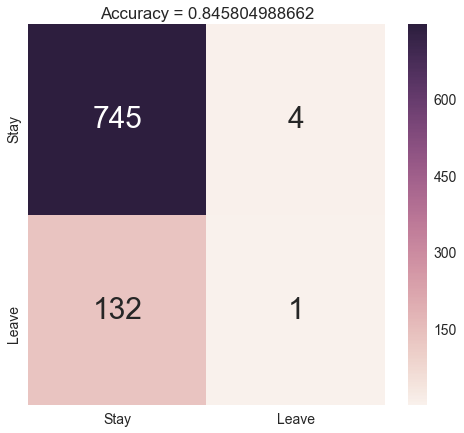

In [320]:
# Fit and Predict
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Performance
accuracy = accuracy_score(y_test,y_pred)
df_cf = pd.DataFrame(confusion_matrix(y_test,y_pred))
df_cf.columns = ['Stay', 'Leave']
df_cf.index = ['Stay', 'Leave']

# Display Performance
plt.figure(figsize = (8,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cf, annot=True,annot_kws={"size": 30}, fmt='g')
plt.title('Accuracy = ' + str(accuracy))
plt.show()

## SVM Classification: Linear Kernel

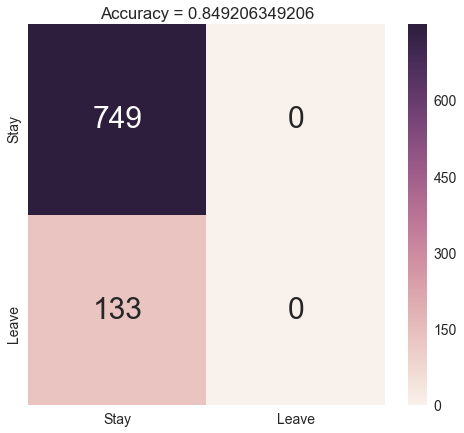

In [321]:
# Fit and Predict
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 
y2_pred = svclassifier.predict(X_test) 

# Performance
accuracy_svc = accuracy_score(y_test, y2_pred)
cm_svc = pd.DataFrame(confusion_matrix(y_test, y2_pred))
cm_svc.columns = ['Stay', 'Leave']
cm_svc.index = ['Stay', 'Leave']

# Display Performance
plt.figure(figsize = (8,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_svc, annot=True,annot_kws={"size": 30}, fmt='g')
plt.title('Accuracy = ' + str(accuracy_svc))
plt.show()


## SVM Classification: RBF Kernel

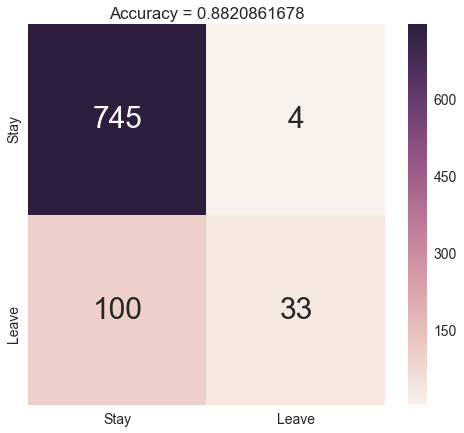

In [322]:
# Fit and Predict
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 
y2_pred = svclassifier.predict(X_test) 

# Performance
accuracy_svc = accuracy_score(y_test, y2_pred)
cm_svc = pd.DataFrame(confusion_matrix(y_test, y2_pred))
cm_svc.columns = ['Stay', 'Leave']
cm_svc.index = ['Stay', 'Leave']

# Display Performance
plt.figure(figsize = (8,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_svc, annot=True,annot_kws={"size": 30}, fmt='g')
plt.title('Accuracy = ' + str(accuracy_svc))
plt.show()


## SVM Classification: Polynomial Kernel

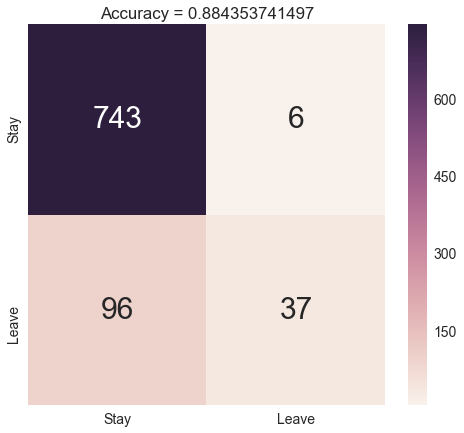

In [323]:
# Fit and Predict
svclassifier = SVC(kernel='poly')  
svclassifier.fit(X_train, y_train) 
y2_pred = svclassifier.predict(X_test) 

# Performance
accuracy_svc = accuracy_score(y_test, y2_pred)
cm_svc = pd.DataFrame(confusion_matrix(y_test, y2_pred))
cm_svc.columns = ['Stay', 'Leave']
cm_svc.index = ['Stay', 'Leave']

# Display Performance
plt.figure(figsize = (8,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_svc, annot=True,annot_kws={"size": 30}, fmt='g')
plt.title('Accuracy = ' + str(accuracy_svc))
plt.show()
